In [1]:
import numpy as np
from matplotlib import pyplot
from PySDM import Formulae
from PySDM.physics import in_unit, si
from open_atmos_jupyter_utils import show_plot
from PySDM_examples.seeding import Settings, Simulation

In [2]:
n_sd_initial = 100
n_sd_seeding = 100
formulae = Formulae(seed=100)

simulations = {
    case: Simulation(
        Settings(
            n_sd_initial=n_sd_initial,
            n_sd_seeding=n_sd_seeding,
            rain_water_radius_threshold=0 * si.mm,
            super_droplet_injection_rate={
                'seeding': lambda time: 1 if 15 * si.min < time < 20 * si.min else 0,
                'no seeding': lambda _: 0,
            }[case],
            formulae=formulae,
            enable_collisions=False,
        )
    )
    for case in ('seeding', 'no seeding')
}    

In [3]:
outputs = {case: simulations[case].run() for case in simulations}

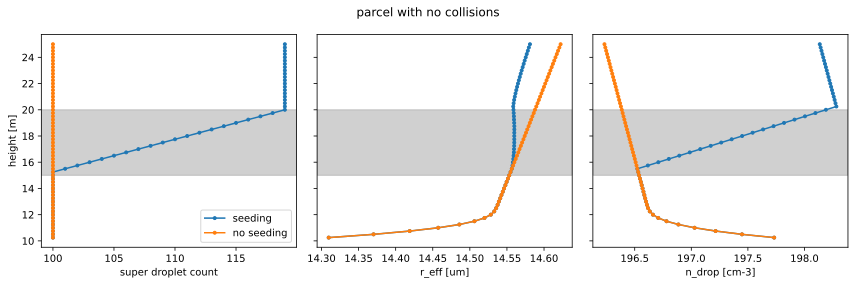

HTML(value="<a href='./seeding_no_collisions.pdf' target='_blank'>./seeding_no_collisions.pdf</a><br>")

In [4]:
fig, axs = pyplot.subplot_mosaic(
        [['a', 'b', 'c']],
        sharey=True,
        figsize=(12, 4),
        tight_layout=True
    )

for case, output in outputs.items():
    time = output['products']['time']
    idx = np.where(time > 10 * si.min)[0]

    axs['a'].plot(
        output['products']['sd_count'][idx],
        in_unit(time[idx], si.min),
        marker='.',
        label=case,
    )
    axs['a'].set_xlabel("super droplet count")
    axs['a'].set_ylabel("height [m]")
    axs['a'].axhspan(15, 20, color="grey", alpha=0.2)

    axs['b'].plot(
        output['products']['r_eff'][idx],
        in_unit(time[idx], si.min),
        marker='.',
    )
    axs['b'].set_xlabel("r_eff [um]")
    axs['b'].axhspan(15, 20, color="grey", alpha=0.2)

    axs['c'].plot(
        output['products']['n_drop'][idx],
        in_unit(time[idx], si.min),
        marker='.',
    )
    axs['c'].set_xlabel("n_drop [cm-3]")
    axs['c'].axhspan(15, 20, color="grey", alpha=0.2)

axs['a'].legend()
fig.suptitle("parcel with no collisions")
show_plot("seeding_no_collisions.pdf")